<a href="https://colab.research.google.com/github/LNshuti/equities-tracker/blob/main/equitieshighlights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
ticker = 'AZO'
start_date = '2008-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,120.099998,120.099998,115.639999,116.209999,116.209999,932900
2008-01-03,116.629997,116.930000,113.300003,113.720001,113.720001,775900
2008-01-04,112.870003,112.900002,110.239998,110.580002,110.580002,978700
2008-01-07,111.449997,113.599998,109.870003,112.650002,112.650002,950800
2008-01-08,113.599998,113.930000,108.150002,108.379997,108.379997,932500
...,...,...,...,...,...,...
2024-08-29,3217.239990,3231.850098,3176.780029,3204.729980,3204.729980,93200
2024-08-30,3210.870117,3234.020020,3149.739990,3181.479980,3181.479980,129700
2024-09-03,3185.729980,3185.729980,3128.709961,3139.669922,3139.669922,133600


In [ ]:
# prompt: What is the date range in the smallest time interval

start_date = data.index[0].date()
end_date = data.index[-1].date()

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

print(f"Smallest time interval: {date_range}")


Smallest time interval: DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-05',
               '2008-01-06', '2008-01-07', '2008-01-08', '2008-01-09',
               '2008-01-10', '2008-01-11',
               ...
               '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30',
               '2024-08-31', '2024-09-01', '2024-09-02', '2024-09-03',
               '2024-09-04', '2024-09-05'],
              dtype='datetime64[ns]', length=6092, freq='D')


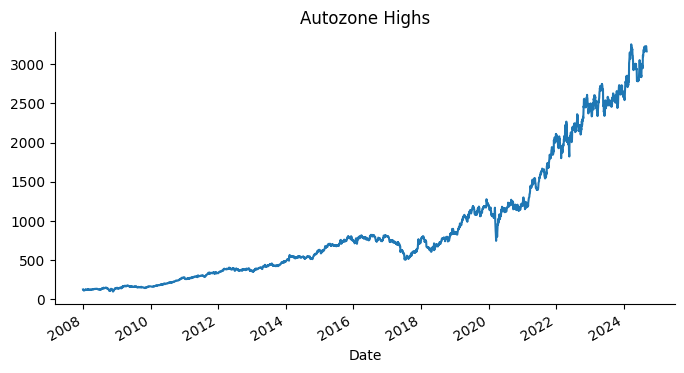

In [ ]:
from matplotlib import pyplot as plt
data['High'].plot(kind='line', figsize=(8, 4), title='Autozone Highs')
plt.gca().spines[['top', 'right']].set_visible(False)

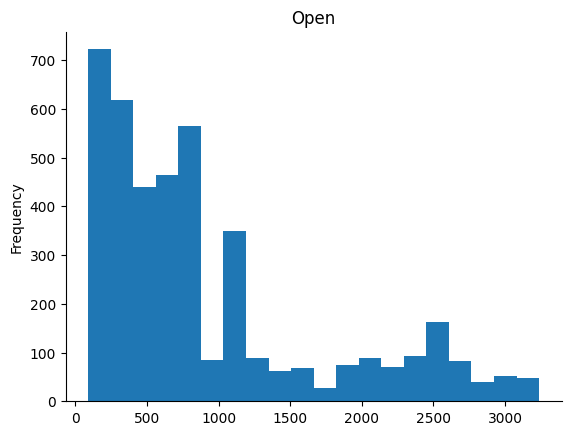

In [ ]:
# @title Open Distribution
from matplotlib import pyplot as plt
data['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

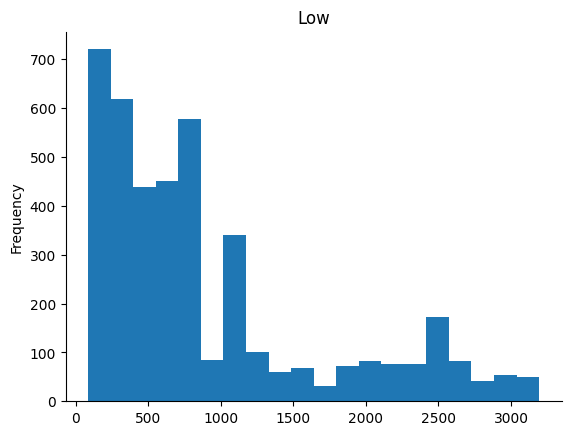

In [ ]:
# @title Low Distribution
from matplotlib import pyplot as plt
data['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

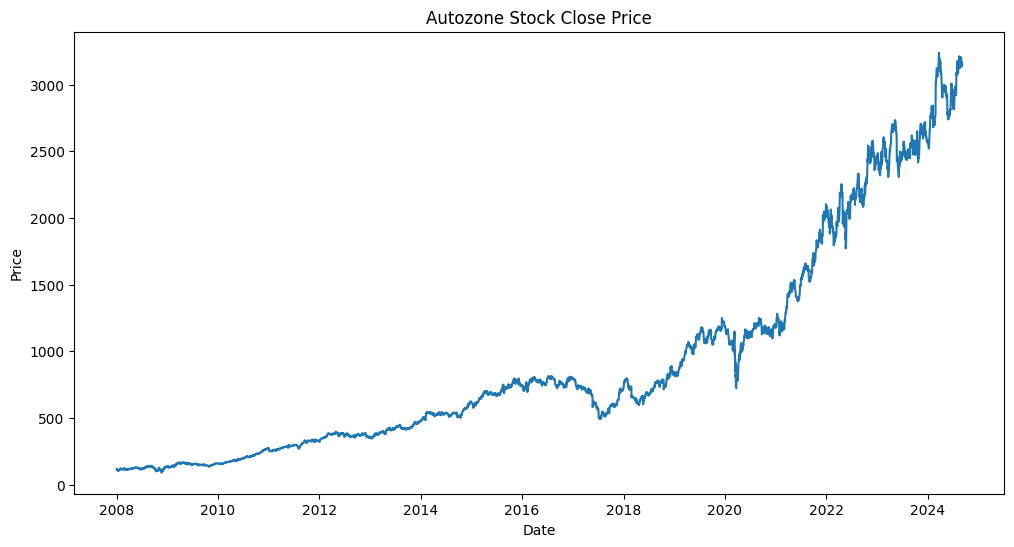

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'])
plt.title('Autozone Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 2.568019426362346
p-value: 0.9990685518563458


In [ ]:
data['Close_diff'] = data['Close'].diff()
data = data.dropna()

# Check stationarity of the differenced series
result = adfuller(data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -18.13239147546559
p-value: 2.503944619961792e-30


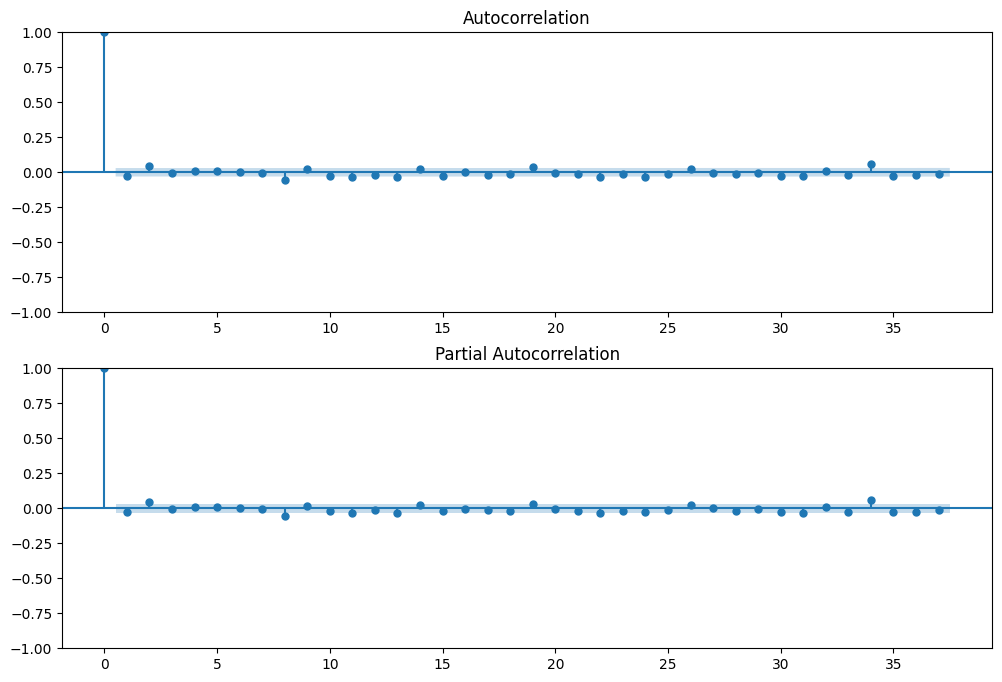

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['Close_diff'], ax=ax1)
plot_pacf(data['Close_diff'], ax=ax2)
plt.show()

In [ ]:
# Example: ARIMA(1,1,1)
model = ARIMA(data['Close'], order=(1,1,1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4197
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18114.876
Date:                Fri, 06 Sep 2024   AIC                          36235.751
Time:                        12:07:32   BIC                          36254.777
Sample:                             0   HQIC                         36242.479
                               - 4197                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5889      0.120     -4.919      0.000      -0.823      -0.354
ma.L1          0.5545      0.124      4.471      0.000       0.311       0.798
sigma2       329.1417      2.266    145.231      0.0

In [ ]:
# Forecast the next 30 days
forecast = results.forecast(steps=30)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_series = pd.Series(forecast, index=forecast_index)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Use the 'Close' price for forecasting
df = data[['Close']]
df = data.asfreq('D').fillna(method='ffill')
df

<ipython-input-49-860df23ed38d>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = data.asfreq('D').fillna(method='ffill')


,Open,High,Low,Close,Adj Close,Volume,Close_diff
Date,,,,,,,
2008-01-03,116.629997,116.930000,113.300003,113.720001,113.720001,775900.0,-2.489998
2008-01-04,112.870003,112.900002,110.239998,110.580002,110.580002,978700.0,-3.139999
2008-01-05,112.870003,112.900002,110.239998,110.580002,110.580002,978700.0,-3.139999
2008-01-06,112.870003,112.900002,110.239998,110.580002,110.580002,978700.0,-3.139999
2008-01-07,111.449997,113.599998,109.870003,112.650002,112.650002,950800.0,2.070000
...,...,...,...,...,...,...,...
2024-09-01,3210.870117,3234.020020,3149.739990,3181.479980,3181.479980,129700.0,-23.250000
2024-09-02,3210.870117,3234.020020,3149.739990,3181.479980,3181.479980,129700.0,-23.250000
2024-09-03,3185.729980,3185.729980,3128.709961,3139.669922,3139.669922,133600.0,-41.810059


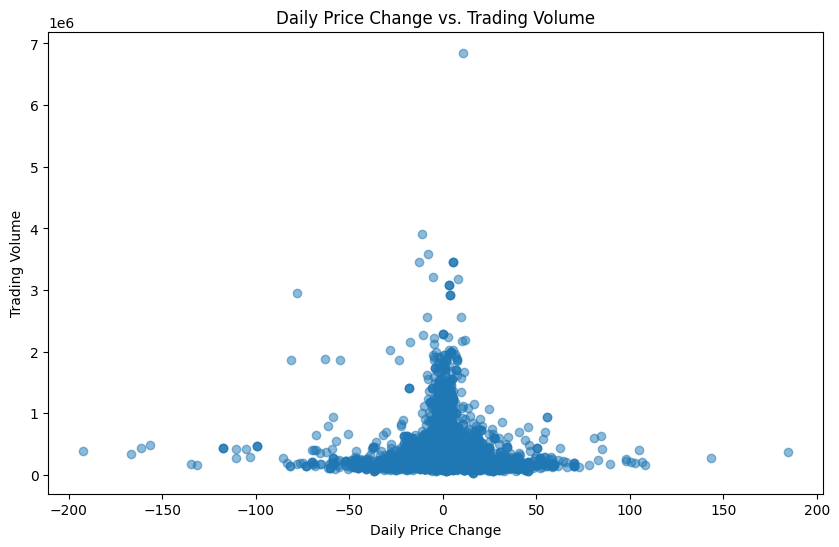

In [ ]:
# @title Daily Price Change vs. Trading Volume
plt.figure(figsize=(10, 6))
plt.scatter(df['Close_diff'], df['Volume'], alpha=0.5)
plt.xlabel('Daily Price Change')
plt.ylabel('Trading Volume')
_ = plt.title('Daily Price Change vs. Trading Volume')

In [ ]:
!pip install yfinance
!pip install gradio
!pip install cachetools
!pip install pstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
from datetime import datetime
from PIL import Image
import io
import gradio as gr
from cachetools import cached, TTLCache
import cProfile
import pstats

# Reproduce Live Gradio APP from https://huggingface.co/spaces/LeonceNsh/stocks-highlights

In [ ]:

# Global fontsize variable
FONT_SIZE = 32
# Company ticker mapping
COMPANY_TICKERS = {
    'Union Pacific': 'UNP',
    'Canadian Pacific KC': 'CP',
    'FedEx': 'FDX',
    'Autozone': 'AZO',
    'XPO Logistics': 'XPO',
    'JB Hunt Transport': 'JBHT',
    'Gilead Sciences': 'GILD',
    'Broadcom Inc':'AVGO',
    'Snap-On': 'SNA',
    'ArcBest': 'ARCB',
    'Arch Capital Group': 'ACGL',
    'Arrow Electronics': 'ARW'
}


# Cache with 1-day TTL
cache = TTLCache(maxsize=100, ttl=86400)

@cached(cache)
def fetch_historical_data(ticker, start_date, end_date):
    """Fetch historical stock data and market cap from Yahoo Finance."""
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            raise ValueError(f"No data found for ticker {ticker}")
        info = yf.Ticker(ticker).info
        market_cap = info.get('marketCap', 'N/A')
        if market_cap != 'N/A':
            market_cap = market_cap / 1e9  # Convert to billions
        return data, market_cap
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None, 'N/A'

def plot_to_image(plt, title, market_cap):
    """Convert plot to a PIL Image object."""
    plt.title(title, fontsize=FONT_SIZE + 1, pad=40)
    plt.suptitle(f'Market Cap: ${market_cap:.2f} Billion', fontsize=FONT_SIZE - 5, y=0.92, weight='bold')
    plt.legend(fontsize=FONT_SIZE)
    plt.xlabel('Date', fontsize=FONT_SIZE)
    plt.ylabel('', fontsize=FONT_SIZE)
    plt.grid(True)
    plt.xticks(rotation=45, ha='right', fontsize=FONT_SIZE)
    plt.yticks(fontsize=FONT_SIZE)
    plt.tight_layout(rect=[0, 0, 1, 0.88])

    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=400)
    plt.close()
    buf.seek(0)
    return Image.open(buf)

def plot_indicator(data, company_name, ticker, indicator, market_cap):
    """Plot selected technical indicator for a single company."""
    plt.figure(figsize=(16, 10))
    if indicator == "SMA":
        sma_55 = data['Close'].rolling(window=55).mean()
        sma_100 = data['Close'].rolling(window=100).mean()  # 100-day SMA
        sma_200 = data['Close'].rolling(window=252).mean()
        plt.plot(data.index, data['Close'], label='Close')
        plt.plot(data.index, sma_55, label='55-day SMA')
        plt.plot(data.index, sma_100, label='100-day SMA')  # Plot 100-day SMA
        plt.plot(data.index, sma_200, label='252-day SMA')
        plt.ylabel('Price', fontsize=FONT_SIZE)
    elif indicator == "MACD":
        exp1 = data['Close'].ewm(span=12, adjust=False).mean()
        exp2 = data['Close'].ewm(span=26, adjust=False).mean()
        macd = exp1 - exp2
        signal = macd.ewm(span=9, adjust=False).mean()
        plt.plot(data.index, macd, label='MACD')
        plt.plot(data.index, signal, label='Signal Line')
        plt.bar(data.index, macd - signal, label='MACD Histogram')
        plt.ylabel('MACD', fontsize=FONT_SIZE)

    return plot_to_image(plt, f'{company_name} ({ticker}) {indicator}', market_cap)

def plot_indicators(company_names, indicator_types):
    """Plot the selected indicators for the selected companies."""
    images = []
    total_market_cap = 0
    if len(company_names) > 7:
        return None, "You can select up to 7 companies at the same time.", None
    if len(company_names) > 1 and len(indicator_types) > 1:
        return None, "You can only select one indicator when selecting multiple companies.", None

    with ThreadPoolExecutor() as executor:
        future_to_company = {
            executor.submit(fetch_historical_data, COMPANY_TICKERS[company], '2000-01-01', datetime.now().strftime('%Y-%m-%d')): (company, indicator)
            for company in company_names
            for indicator in indicator_types
        }

        for future in as_completed(future_to_company):
            company, indicator = future_to_company[future]
            ticker = COMPANY_TICKERS[company]
            data, market_cap = future.result()
            if data is None:
                continue
            images.append(plot_indicator(data, company, ticker, indicator, market_cap))
            if market_cap != 'N/A':
                total_market_cap += market_cap

    return images, "", total_market_cap

def select_all_indicators(select_all):
    """Select or deselect all indicators based on the select_all flag."""
    indicators = ["SMA", "MACD"]
    return indicators if select_all else []

def launch_gradio_app():
    """Launch the Gradio app for interactive plotting."""
    company_choices = list(COMPANY_TICKERS.keys())
    indicators = ["SMA", "MACD"]

    def fetch_and_plot(company_names, indicator_types):
        images, error_message, total_market_cap = plot_indicators(company_names, indicator_types)
        if error_message:
            return [None] * len(indicator_types), error_message, None
        return images, "", f"Total Market Cap: ${total_market_cap:.2f} Billion" if total_market_cap else "N/A"

    with gr.Blocks() as demo:
        company_checkboxgroup = gr.CheckboxGroup(choices=company_choices, label="Select Companies")

        select_all_checkbox = gr.Checkbox(label="Select All Indicators", value=False, interactive=True)
        indicator_types_checkboxgroup = gr.CheckboxGroup(choices=indicators, label="Select Technical Indicators")
        select_all_checkbox.change(select_all_indicators, inputs=select_all_checkbox, outputs=indicator_types_checkboxgroup)

        plot_gallery = gr.Gallery(label="Indicator Plots")
        error_markdown = gr.Markdown()
        market_cap_text = gr.Markdown()

        gr.Interface(
            fetch_and_plot,
            [company_checkboxgroup, indicator_types_checkboxgroup],
            [plot_gallery, error_markdown, market_cap_text]
        )

    demo.launch()

def profile_code():
    """Profile the main functions to find speed bottlenecks."""
    profiler = cProfile.Profile()
    profiler.enable()

    launch_gradio_app()

    profiler.disable()
    stats = pstats.Stats(profiler).sort_stats('cumtime')
    stats.print_stats(10)

In [ ]:

if __name__ == "__main__":
    profile_code()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6beb83240c87da9af5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


         713802 function calls (669551 primitive calls) in 3.545 seconds

   Ordered by: cumulative time
   List reduced from 1873 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    3.559    3.559 <ipython-input-34-f8c3a205d396>:114(launch_gradio_app)
        1    0.000    0.000    2.142    2.142 /usr/local/lib/python3.10/dist-packages/gradio/blocks.py:2162(launch)
        5    0.003    0.001    1.536    0.307 /usr/local/lib/python3.10/dist-packages/gradio/routes.py:260(create_app)
      255    0.003    0.000    1.516    0.006 /usr/local/lib/python3.10/dist-packages/fastapi/routing.py:991(decorator)
      255    0.007    0.000    1.513    0.006 /usr/local/lib/python3.10/dist-packages/fastapi/routing.py:879(add_api_route)
      255    0.015    0.000    1.504    0.006 /usr/local/lib/python3.10/dist-packages/fastapi/routing.py:429(__init__)
        5    0.000    0.000    1.445    0.289 /usr/local/lib/python